<a href="https://colab.research.google.com/github/DS3001/group3/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/DS3001/group3.git

fatal: destination path 'group3' already exists and is not an empty directory.


**Summary**


**Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('./group3/project_2/data/training_data.csv')
df_test = pd.read_csv('./group3/project_2/data/testing_data.csv')
df_train = df_train.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)
df_test = df_test.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)


y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4087 non-null   object 
 1   age                4087 non-null   float64
 2   hypertension       4087 non-null   int64  
 3   heart_disease      4087 non-null   int64  
 4   work_type          4087 non-null   object 
 5   Residence_type     4087 non-null   object 
 6   avg_glucose_level  4087 non-null   float64
 7   bmi                3928 non-null   float64
 8   smoking_status     4087 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 287.5+ KB


In [ ]:
X_train.head()


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,36.0,0,0,Govt_job,Urban,65.87,32.2,formerly smoked
1,Female,45.0,0,0,Govt_job,Rural,68.66,25.3,never smoked
2,Male,58.0,0,0,Self-employed,Rural,170.93,30.7,Unknown
3,Female,61.0,0,0,Self-employed,Urban,69.88,27.1,never smoked
4,Female,78.0,0,0,Private,Urban,103.86,30.6,Unknown


In [ ]:
X_train['bmi'].info()
#There are about 150 nans in bmi, to deal with these, we replaced the nan's with the average for BMI

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
3928 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


In [ ]:
X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())
X_train['bmi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
4087 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


<Axes: >

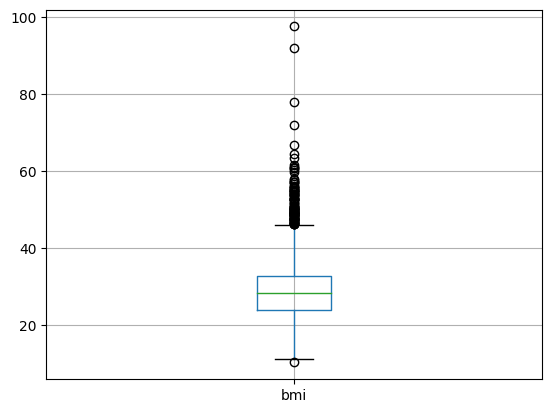

In [ ]:
X_train.boxplot(column='bmi')
#While there is a lot of outliers, these are all valid BMI's to have, so we left them in because
#a high BMI might be very telling of a stroke.

<Axes: >

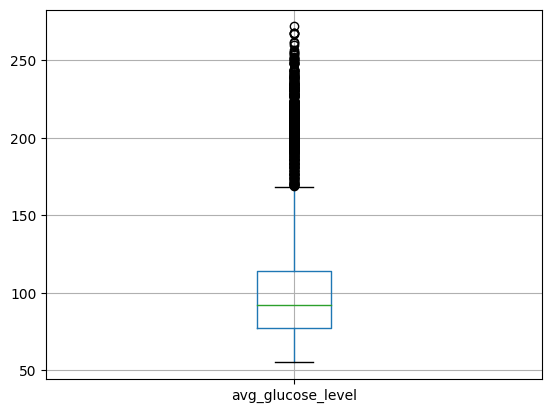

In [ ]:
X_train.boxplot(column='avg_glucose_level')
#We realize there are outliers, but because there are so many, we thought that any form of cleaning would be
#too drastic of a change to the dataset.

In [ ]:
X_train['avg_glucose_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
4087 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


In [ ]:
X_test['avg_glucose_level'].info()
#This shows there are no nans to clean up.

<class 'pandas.core.series.Series'>
RangeIndex: 1023 entries, 0 to 1022
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
1023 non-null   float64
dtypes: float64(1)
memory usage: 8.1 KB


<Axes: >

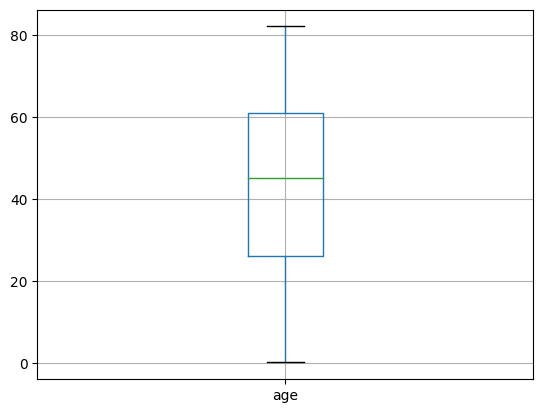

In [ ]:
X_train.boxplot(column='age')
#The age variable, unsurprisingly, doesn't have any outliers.

In [ ]:
X_train['avg_glucose_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
4087 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


In [ ]:
X_test['avg_glucose_level'].info()
#There are no nan's to clean up in age.

<class 'pandas.core.series.Series'>
RangeIndex: 1023 entries, 0 to 1022
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
1023 non-null   float64
dtypes: float64(1)
memory usage: 8.1 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: stroke
Non-Null Count  Dtype
--------------  -----
4087 non-null   int64
dtypes: int64(1)
memory usage: 32.1 KB


In [ ]:
y_test.info()
#There are no nans in the stroke variable to clean up.

<class 'pandas.core.series.Series'>
RangeIndex: 1023 entries, 0 to 1022
Series name: stroke
Non-Null Count  Dtype
--------------  -----
1023 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


In [ ]:
X_train['smoking_status'].value_counts()

never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64

In [ ]:
X_train.loc[X_train['smoking_status']=='Unknown','smoking_status'] = 'never smoked'
X_train.loc[X_train['smoking_status']=='formerly smoked','smoking_status'] = 'smokes'
X_train['smoking_status'].value_counts()
#to clean up the smoking variable, we essentially turned it into a binary being you gave either never smoked, or you
#have smoked. We did this by combining the formerly smoked category with the smokes category, and the the unknown
#with the never smoked category. This created the two categories you see below.

never smoked    2746
smokes          1341
Name: smoking_status, dtype: int64

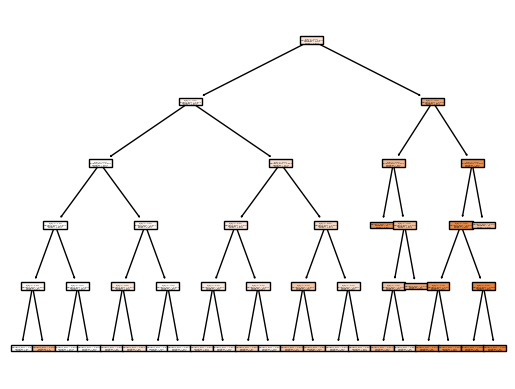

R-squared (R2): 0.06300373501753886
Root Mean Squared Error (RMSE): 0.20870589613090598


In [ ]:
#Tree Model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

X_train = X_train.loc[:,['age'] ]
X_test = X_test.loc[:,['age'] ]

y_train = df_train['stroke']

model = tree.DecisionTreeRegressor(max_depth=5)
cart = model.fit(X_train, y_train)

# Plot the tree
tree.plot_tree(cart, filled=True)
plt.show()

# Make predictions on the test set
y_pred = cart.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)



ValueError: ignored

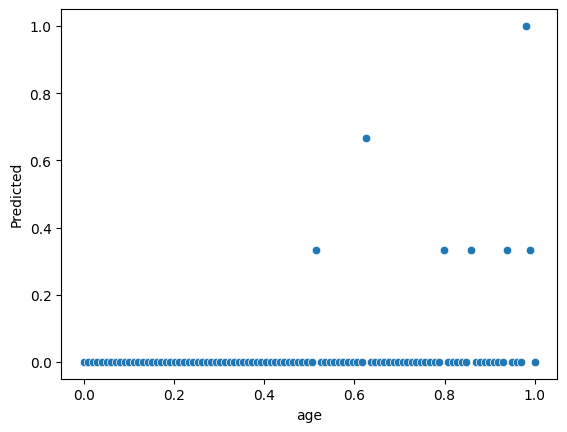

In [ ]:
## KNN
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool
import seaborn as sns

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X_train = X_train.loc[:,['age']]
X_test = X_test.loc[:,['age']]

# Apply maxmin to each column of X to get U:
X_train = X_train.apply(maxmin)

y_train = df_train['stroke']

k=3
model = kNNRegression(n_neighbors=k) # Create a sk model for k=3
fitted_model = model.fit(X_train,y_train) # Train the model on our data

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors

x_hat = pd.DataFrame({'age':X}) # Create a dataframe of points to plot
y_hat = fitted_model.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

this_plot = sns.scatterplot(data=x_hat,x='age',y='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas



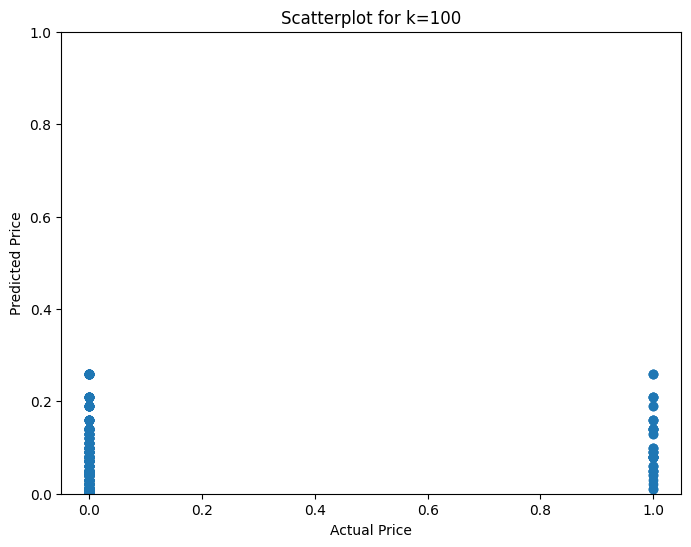

MSE for k=100: 0.043399511241446746


In [ ]:
k_values = [100]
for k in k_values: #Used chat gpt to write this
    # Create a new figure for each k
    plt.figure(figsize=(8, 6))

    # Initialize and fit the k-nearest neighbors regression model
    knn = kNNRegression(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict prices
    y_pred = knn.predict(X_test)

    # Create a scatterplot
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Scatterplot for k={k}')
    plt.ylim(y_test.min(), y_test.max()) #Set the same y axes for all plots

    # Save or show the plot
    plt.show()  # Uncomment this line to display the plot interactively

    # Compute and print MSE for each k value
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE for k={k}: {mse}')

In [ ]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure

ValueError: ignored

**Results**

**Conclusion**